# Unsupervised Lab Session

## Learning outcomes:
- Exploratory data analysis and data preparation for model building.
- PCA for dimensionality reduction.
- K-means and Agglomerative Clustering

## Problem Statement
Based on the given marketing campigan dataset, segment the similar customers into suitable clusters. Analyze the clusters and provide your insights to help the organization promote their business.

## Context:
- Customer Personality Analysis is a detailed analysis of a company’s ideal customers. It helps a business to better understand its customers and makes it easier for them to modify products according to the specific needs, behaviors and concerns of different types of customers.
- Customer personality analysis helps a business to modify its product based on its target customers from different types of customer segments. For example, instead of spending money to market a new product to every customer in the company’s database, a company can analyze which customer segment is most likely to buy the product and then market the product only on that particular segment.

## About dataset
- Source: https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis?datasetId=1546318&sortBy=voteCount

### Attribute Information:
- ID: Customer's unique identifier
- Year_Birth: Customer's birth year
- Education: Customer's education level
- Marital_Status: Customer's marital status
- Income: Customer's yearly household income
- Kidhome: Number of children in customer's household
- Teenhome: Number of teenagers in customer's household
- Dt_Customer: Date of customer's enrollment with the company
- Recency: Number of days since customer's last purchase
- Complain: 1 if the customer complained in the last 2 years, 0 otherwise
- MntWines: Amount spent on wine in last 2 years
- MntFruits: Amount spent on fruits in last 2 years
- MntMeatProducts: Amount spent on meat in last 2 years
- MntFishProducts: Amount spent on fish in last 2 years
- MntSweetProducts: Amount spent on sweets in last 2 years
- MntGoldProds: Amount spent on gold in last 2 years
- NumDealsPurchases: Number of purchases made with a discount
- AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
- AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
- AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
- AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
- AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
- Response: 1 if customer accepted the offer in the last campaign, 0 otherwise
- NumWebPurchases: Number of purchases made through the company’s website
- NumCatalogPurchases: Number of purchases made using a catalogue
- NumStorePurchases: Number of purchases made directly in stores
- NumWebVisitsMonth: Number of visits to company’s website in the last month

### 1. Import required libraries

In [88]:
# importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler,LabelEncoder
from scipy import stats
from sklearn.cluster import KMeans
from scipy.stats import zscore
from scipy.spatial import distance
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

### 2. Load the CSV file (i.e marketing.csv) and display the first 5 rows of the dataframe. Check the shape and info of the dataset.

In [38]:
df = pd.read_csv('D:/frontend/Lab4_10dec2023/Lab 4 - Unsupervised learinng/marketing.csv')
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,5524,1957,Graduation,Single,58138.0,0,0,4/9/2012,58,635,...,10,4,7,0,0,0,0,0,0,1
1,2174,1954,Graduation,Single,46344.0,1,1,8/3/2014,38,11,...,1,2,5,0,0,0,0,0,0,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,2,10,4,0,0,0,0,0,0,0
3,6182,1984,Graduation,Together,26646.0,1,0,10/2/2014,26,11,...,0,4,6,0,0,0,0,0,0,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,3,6,5,0,0,0,0,0,0,0


In [39]:
df.shape

(2240, 27)

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

### 3. Check the percentage of missing values? If there is presence of missing values, treat them accordingly.

In [41]:
df.isnull().sum()/len(df)*100

ID                     0.000000
Year_Birth             0.000000
Education              0.000000
Marital_Status         0.000000
Income                 1.071429
Kidhome                0.000000
Teenhome               0.000000
Dt_Customer            0.000000
Recency                0.000000
MntWines               0.000000
MntFruits              0.000000
MntMeatProducts        0.000000
MntFishProducts        0.000000
MntSweetProducts       0.000000
MntGoldProds           0.000000
NumDealsPurchases      0.000000
NumWebPurchases        0.000000
NumCatalogPurchases    0.000000
NumStorePurchases      0.000000
NumWebVisitsMonth      0.000000
AcceptedCmp3           0.000000
AcceptedCmp4           0.000000
AcceptedCmp5           0.000000
AcceptedCmp1           0.000000
AcceptedCmp2           0.000000
Complain               0.000000
Response               0.000000
dtype: float64

In [42]:
## We have a missing value in Income and we will treat it

In [43]:
df['Income']=df['Income'].fillna(df['Income'].mean())
df.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Response               0
dtype: int64

### 4. Check if there are any duplicate records in the dataset? If any drop them.

In [44]:
len(df[df.duplicated()])

0

In [45]:
# There are no missing values

### 5. Drop the columns which you think redundant for the analysis 

In [46]:
df=df.drop(columns=['ID','Dt_Customer'],axis=1)

### 6. Check the unique categories in the column 'Marital_Status'
- i) Group categories 'Married', 'Together' as 'relationship'
- ii) Group categories 'Divorced', 'Widow', 'Alone', 'YOLO', and 'Absurd' as 'Single'.

In [47]:
df['Marital_Status'].value_counts()

Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

In [48]:
df['Marital_Status'] = df['Marital_Status'].replace(['Married' ,'Together'] ,'relationship')

In [49]:
df['Marital_Status'] = df['Marital_Status'].replace(['Divorced', 'Widow', 'Alone', 'YOLO','Absurd'],'Single')

In [50]:
df['Marital_Status'].unique()

array(['Single', 'relationship'], dtype=object)

In [51]:
#In the above we are grouping 'Married', 'Together' as 'relationship' and 'Divorced', 'Widow', 'Alone', 'YOLO', and 'Absurd' as 'Single'

### 7. Group the columns 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', and 'MntGoldProds' as'Total_Expenses' 

In [52]:
df['Total_Expenses']= df['MntWines'] + df[ 'MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']

### 8. Group the columns 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', and 'NumDealsPurchases' as 'Num_Total_Purchases'

In [53]:
df['Num_Total_Purchases']=df['NumWebPurchases'] + df['NumCatalogPurchases'] +df['NumStorePurchases'] +df['NumDealsPurchases']

### 9. Group the columns 'Kidhome' and 'Teenhome' as 'Kids'

In [54]:
df['Kids']=df['Kidhome'] +df['Teenhome']

### 10. Group columns 'AcceptedCmp1 , 2 , 3 , 4, 5' and 'Response' as 'TotalAcceptedCmp'

In [55]:
df['TotalAcceptedCmp']=df['AcceptedCmp1']+df['AcceptedCmp2'] +df['AcceptedCmp3'] +df['AcceptedCmp4']+df['AcceptedCmp5'] +df['Response']

### 11. Drop those columns which we have used above for obtaining new features

In [56]:
col_del=['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response','NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases','NumDealsPurchases','Kidhome', 'Teenhome', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts','MntGoldProds'  ]
df=df.drop(columns=col_del, axis=1)
df.head()

,Year_Birth,Education,Marital_Status,Income,Recency,NumWebVisitsMonth,Complain,Total_Expenses,Num_Total_Purchases,Kids,TotalAcceptedCmp
0,1957,Graduation,Single,58138.0,58,7,0,1617,25,0,1
1,1954,Graduation,Single,46344.0,38,5,0,27,6,2,0
2,1965,Graduation,relationship,71613.0,26,4,0,776,21,0,0
3,1984,Graduation,relationship,26646.0,26,6,0,53,8,1,0
4,1981,PhD,relationship,58293.0,94,5,0,422,19,1,0


### 12. Extract 'age' using the column 'Year_Birth' and then drop the column 'Year_birth'

In [57]:
df['Age']=2022-df['Year_Birth']

df.drop('Year_Birth', axis=1,inplace=True)

df.head(2)

,Education,Marital_Status,Income,Recency,NumWebVisitsMonth,Complain,Total_Expenses,Num_Total_Purchases,Kids,TotalAcceptedCmp,Age
0,Graduation,Single,58138.0,58,7,0,1617,25,0,1,65
1,Graduation,Single,46344.0,38,5,0,27,6,2,0,68


In [58]:
dfc=df.copy()

### 13. Encode the categorical variables in the dataset

In [59]:
cate=['Education' ,'Marital_Status']
lbl_encode=LabelEncoder()
for i in cate:
    df[i]=df[[i]].apply(lbl_encode.fit_transform)

df.head()

,Education,Marital_Status,Income,Recency,NumWebVisitsMonth,Complain,Total_Expenses,Num_Total_Purchases,Kids,TotalAcceptedCmp,Age
0,2,0,58138.0,58,7,0,1617,25,0,1,65
1,2,0,46344.0,38,5,0,27,6,2,0,68
2,2,1,71613.0,26,4,0,776,21,0,0,57
3,2,1,26646.0,26,6,0,53,8,1,0,38
4,4,1,58293.0,94,5,0,422,19,1,0,41


### 14. Standardize the columns, so that values are in a particular range

In [60]:
df1 = df.copy()
scaled_features = StandardScaler().fit_transform(df1.values)
scaled_features_df= pd.DataFrame(scaled_features, index=df1.index, columns=df1.columns)

In [61]:
scaled_features_df.head(3)

,Education,Marital_Status,Income,Recency,NumWebVisitsMonth,Complain,Total_Expenses,Num_Total_Purchases,Kids,TotalAcceptedCmp,Age
0,-0.350141,-1.346874,0.235327,0.307039,0.693904,-0.097282,1.679417,1.320826,-1.264505,0.621248,0.985345
1,-0.350141,-1.346874,-0.235826,-0.383664,-0.130463,-0.097282,-0.961275,-1.154596,1.396361,-0.501912,1.235733
2,-0.350141,0.742460,0.773633,-0.798086,-0.542647,-0.097282,0.282673,0.799685,-1.264505,-0.501912,0.317643


### 15. Apply PCA on the above dataset and determine the number of PCA components to be used so that 90-95% of the variance in data is explained by the same.

In [62]:
#step1: Calculate co-variance matrix
cov_matrix = np.cov(scaled_features.T)
cov_matrix

array([[ 1.00044663, -0.01375403,  0.1200273 , -0.01173369, -0.04029882,
        -0.05056252,  0.09209518,  0.09405439,  0.05321304,  0.06327892,
         0.17146685],
       [-0.01375403,  1.00044663,  0.00463847, -0.00450972,  0.00344176,
        -0.00520466, -0.01775232,  0.00671037,  0.03917598, -0.06004206,
        -0.0042384 ],
       [ 0.1200273 ,  0.00463847,  1.00044663, -0.00394826, -0.55006966,
        -0.02723528,  0.66500337,  0.5636214 , -0.29084155,  0.28717443,
         0.16101378],
       [-0.01173369, -0.00450972, -0.00394826,  1.00044663, -0.02145427,
         0.01323699,  0.02044173,  0.00574294,  0.01806145, -0.08900203,
         0.01987996],
       [-0.04029882,  0.00344176, -0.55006966, -0.02145427,  1.00044663,
         0.01977734, -0.50044131, -0.31242795,  0.41860616, -0.12836726,
        -0.12119336],
       [-0.05056252, -0.00520466, -0.02723528,  0.01323699,  0.01977734,
         1.00044663, -0.03707503, -0.02059185,  0.03108014, -0.01761676,
         0.030

In [63]:
#step2: Calculate the Eigenvalues and eigen vectors
eig_values, eig_vectors = np.linalg.eig(cov_matrix)
print('Eigen Values:' ,'\n',eig_values )
print('\n')
print('Eigen Vectors:' ,'\n',eig_vectors )

Eigen Values: 
 [3.19039372 0.15898065 0.33403219 1.25762686 0.57476787 0.70088408
 0.81488009 0.88268465 1.07560545 0.99819186 1.01686548]


Eigen Vectors: 
 [[-8.10878879e-02  1.28355184e-02  2.36293947e-02  5.51249544e-01
   9.44095922e-02  1.09410621e-01  6.91170717e-01 -2.13981881e-01
   3.53512225e-01  1.33215293e-01  4.14647769e-02]
 [ 1.66012105e-02  5.44320001e-04  2.67214391e-03  7.24616823e-02
   9.22507506e-03 -1.59630615e-01  9.75252262e-02 -2.48006969e-01
  -2.93241983e-01 -5.20771188e-01  7.35314297e-01]
 [-4.53880338e-01  1.10208189e-01 -7.33626969e-01  1.11676478e-01
  -4.01003018e-01  2.33850859e-01 -3.55906464e-02  8.23323221e-02
  -7.12476789e-02 -3.27656138e-02  3.84949439e-02]
 [ 4.86396555e-03  3.74604574e-02 -1.76527197e-02  1.12971535e-01
  -4.88116231e-02 -1.39195279e-01  2.76319114e-02 -4.78177475e-01
  -6.57510164e-01  5.43205810e-01 -8.32561223e-02]
 [ 3.78658345e-01 -9.89489261e-02 -5.23256954e-01  3.88425153e-02
   4.48112460e-01  8.25533630e-02 -2.949122

In [66]:
#step3 Scree plot
total=sum(eig_values)
var_exp= [(i/total)*100 for i in sorted(eig_values, reverse=True)]
cum_var_exp=np.cumsum(var_exp)
print('Explained Variance', var_exp)
print('\n')
print('Cumulative Variance Explained',cum_var_exp )

Explained Variance [28.990631201030727, 11.427867418203094, 9.773866099738877, 9.240104772844969, 9.070420346680976, 8.020823626792364, 7.404693691240473, 6.368828985843843, 5.222829816381416, 3.035300649436155, 1.4446333918071101]


Cumulative Variance Explained [ 28.9906312   40.41849862  50.19236472  59.43246949  68.50288984
  76.52371347  83.92840716  90.29723614  95.52006596  98.55536661
 100.        ]


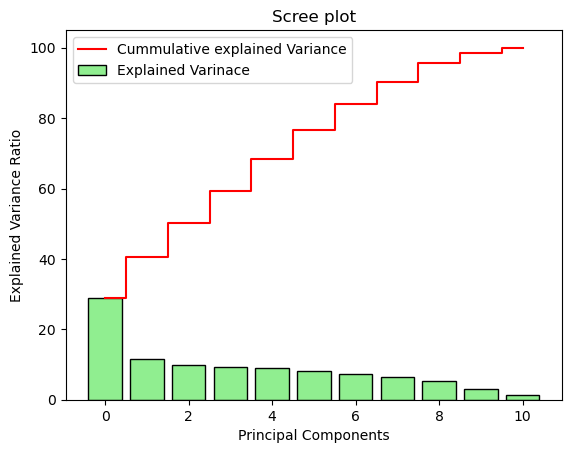

In [68]:
## Scree plot
plt.bar(range(11),var_exp, align='center',color='lightgreen',edgecolor='black',label='Explained Varinace')
plt.step(range(11), cum_var_exp, where='mid',color='red',label='Cummulative explained Variance')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.legend(loc = 'best')
plt.title('Scree plot')
plt.show()

In [ ]:
# We can see from the above Scree plot that first 8 principal components explain about 90-95% of variation so we can choose optimal number of pincipal components as 8

### 16. Apply K-means clustering and segment the data (Use PCA transformed data for clustering)

In [69]:
pca=PCA(n_components=8)
pca_df=pd.DataFrame(pca.fit_transform(scaled_features_df),columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8'])
pca_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
0,1.956902,-0.081936,-0.344667,1.193687,-0.696970,-0.299137,-1.145041,-0.358094
1,-1.512598,1.000666,-0.367106,1.006953,-0.445000,1.371965,-0.724374,-0.346359
2,1.314538,-0.299417,0.296366,-0.764913,0.732877,0.984394,0.025389,0.058563
3,-1.755094,-1.139847,-0.254499,-0.825065,0.579217,0.221975,0.562426,0.239541
4,0.063584,0.571435,0.902243,-0.757574,-0.794825,-1.241683,1.325626,0.898316


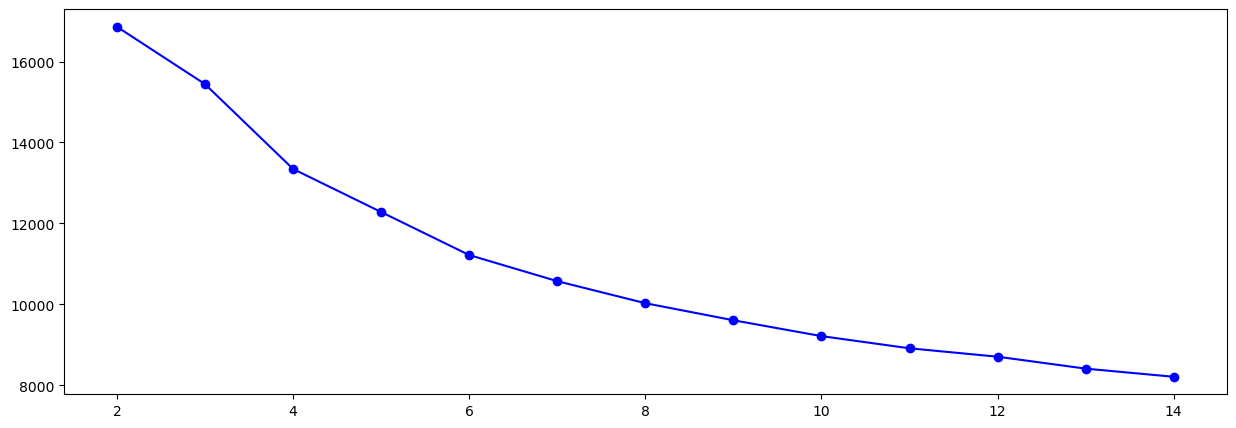

In [71]:
cluster_errors = []
cluster_range = range(2,15)

for num_clusters in cluster_range:
   
    clusters = KMeans(num_clusters, random_state=100)
    clusters.fit(pca_df)
    cluster_errors.append(clusters.inertia_)

cluster_df = pd.DataFrame({'num_clusters':cluster_range, 'cluster_errors':cluster_errors})

plt.figure(figsize=[15,5])
plt.plot(cluster_df['num_clusters'], cluster_df['cluster_errors'], marker='o',color='b')
plt.show()

In [ ]:
# From the above plot we can see that at K=3 inertia significantly decreases, Hence we can select optimal cluster as K=3

In [72]:
# Fit the KMeans clustering model using the obtained optimal K
kmeans = KMeans(n_clusters=3, random_state=100)
kmeans.fit(pca_df)

KMeans(n_clusters=3, random_state=100)

In [73]:
# Creating a dataframe of labels.
label = pd.DataFrame(kmeans.labels_, columns=['Label'])

In [74]:
# Joining the label dataframe to pca_df dataframe
kmeans_df = pca_df.join(label)
kmeans_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,Label
0,1.956902,-0.081936,-0.344667,1.193687,-0.696970,-0.299137,-1.145041,-0.358094,0
1,-1.512598,1.000666,-0.367106,1.006953,-0.445000,1.371965,-0.724374,-0.346359,1
2,1.314538,-0.299417,0.296366,-0.764913,0.732877,0.984394,0.025389,0.058563,0
3,-1.755094,-1.139847,-0.254499,-0.825065,0.579217,0.221975,0.562426,0.239541,1
4,0.063584,0.571435,0.902243,-0.757574,-0.794825,-1.241683,1.325626,0.898316,2


In [77]:
kmeans_df['Label'].value_counts()

1    1023
2     704
0     513
Name: Label, dtype: int64

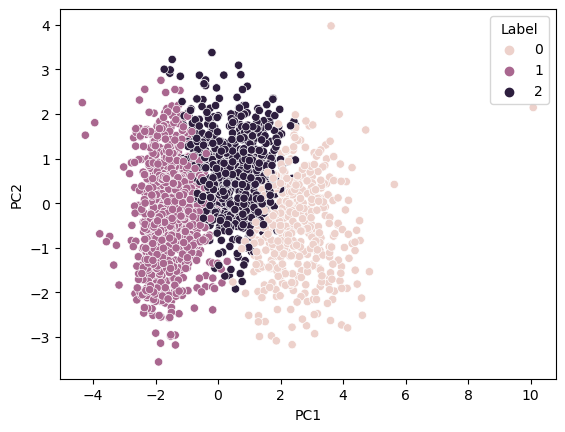

In [95]:
sns.scatterplot(x=kmeans_df['PC1'],y=kmeans_df['PC2'],hue='Label',data=kmeans_df)
plt.show()

### 17. Apply Agglomerative clustering and segment the data (Use Original data for clustering), and perform cluster analysis by doing bivariate analysis between the cluster label and different features and write your observations.

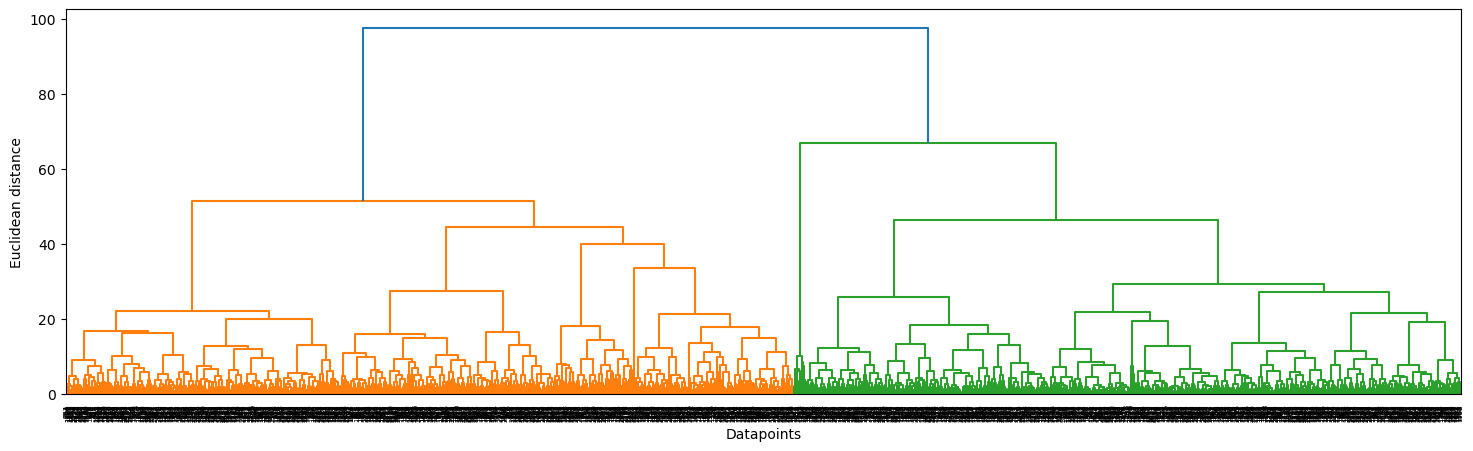

In [87]:
plt.figure(figsize=[18,5])
merg = linkage(scaled_features, method='ward')
dendrogram(merg, leaf_rotation=90,)
plt.xlabel('Datapoints')
plt.ylabel('Euclidean distance')
plt.show()

In [89]:
for i in range(2,15):
    hier = AgglomerativeClustering(n_clusters=i)
    hier = hier.fit(scaled_features_df)
    labels = hier.fit_predict(scaled_features_df)
    print(i,silhouette_score(scaled_features_df,labels))

2 0.19083932398841263
3 0.19859065923121116
4 0.11245037433445754
5 0.1142462175685332
6 0.13181821517770267
7 0.13957002140192074
8 0.1390706310270007
9 0.11337088108590954
10 0.11192131225156017
11 0.10382081162153395
12 0.10893099764800893
13 0.1023394958833542
14 0.09549869159604249


In [ ]:
# we can observe from the above dendogram and silhouette score , the highest silhouette score is for cluster 3
# Lets choose K=3 as optimal cluster size and build a agglomerative clustering model using original scaled data set

In [90]:
# Building hierarchical clustering model using the optimal clusters as 3
hie_cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean',
                                     linkage='ward')
hie_cluster_model = hie_cluster.fit(scaled_features_df)

In [91]:
## Creating a dataframe of the labels
df_label1 = pd.DataFrame(hie_cluster_model.labels_,columns=['Labels'])
df_label1.head(5)

,Labels
0,0
1,1
2,0
3,1
4,0


In [92]:
# Joining the label dataframe with unscaled initial cleaned dataframe
df_hier=dfc.join(df_label1)
df_hier.head()

,Education,Marital_Status,Income,Recency,NumWebVisitsMonth,Complain,Total_Expenses,Num_Total_Purchases,Kids,TotalAcceptedCmp,Age,Labels
0,Graduation,Single,58138.0,58,7,0,1617,25,0,1,65,0
1,Graduation,Single,46344.0,38,5,0,27,6,2,0,68,1
2,Graduation,relationship,71613.0,26,4,0,776,21,0,0,57,0
3,Graduation,relationship,26646.0,26,6,0,53,8,1,0,38,1
4,PhD,relationship,58293.0,94,5,0,422,19,1,0,41,0


### Visualization and Interpretation of results

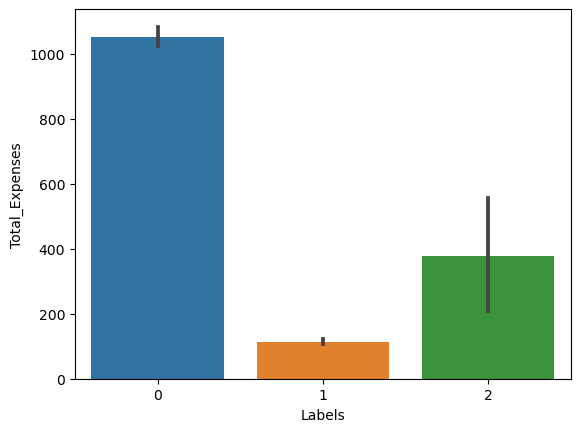

In [94]:
sns.barplot(x=df_hier['Labels'],y=df_hier['Total_Expenses'])
plt.show()

In [ ]:
# Thetotal expenses is much higher for cluster0 as compared to cluster1 and cluster2

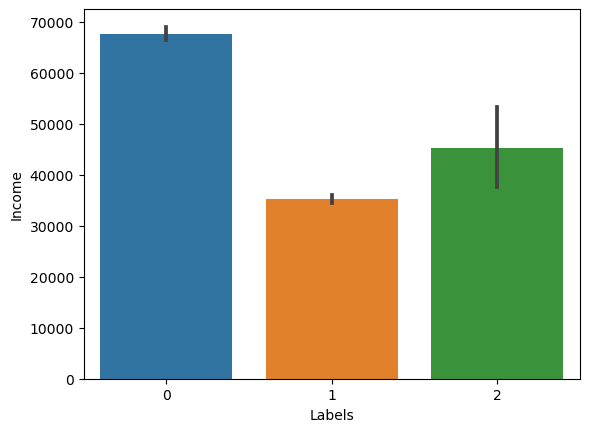

In [96]:
sns.barplot(x=df_hier['Labels'],y=df_hier['Income'])
plt.show()

In [ ]:
# whereas the income is also higher for cluster0 followed by cluster2

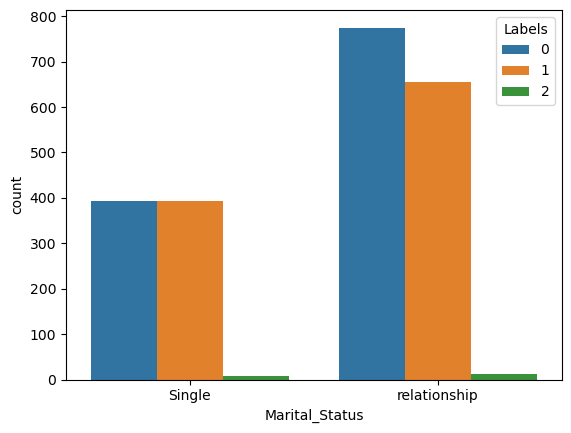

In [98]:
sns.countplot(x=df_hier['Marital_Status'],hue='Labels',data=df_hier)
plt.show()

In [ ]:
#We can observe that most of the customer who are in relationship fall in cluster0.

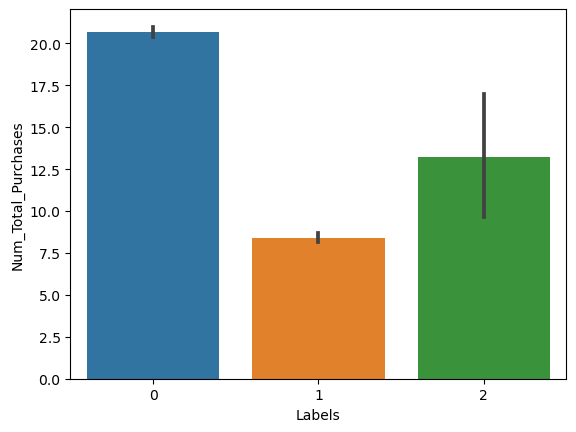

In [99]:
sns.barplot(x=df_hier['Labels'],y=df_hier['Num_Total_Purchases'])
plt.show()

In [ ]:
# the total number of purchases is also much higher for customers from cluster0.

In [ ]:
# Finally we can conclude that customers belonging to cluster0 does maximum purchases, spend maximum amount and have maximum income
#Whereas customers belonging to cluster1 have least Total expense, minimum balance and does minimum purchases as compared to other two clusters
#Customers belonging to cluster2 have average income and average purchases.

-----
## Happy Learning
-----